# WeatherPy

In [ ]:
# This program was written by Radha Mahalingam (3-25-19)
# Python API project

# This project amplifies the data's true power - i.e its ability to answer questions definitively. 
# By using Python requests, APIs, and JSON traversals, this program answers definitively a fundamental question: 
#"What's the weather like as we approach the equator?"

# While we all know that "It gets hotter as we approach the equator", this data analysis proves it, beyond any doubt

## WeatherPy

# In this example,  a Python script is created to visualize the weather of 500+ cities across the world of 
# varying distance from the equator. To accomplish this, I utilized a simple Python library - 
# (https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), 
# and a little common sense to create a representative model of weather across world cities.

# A series of scatter plots are created using the data obtained through APIs to showcase the following relationships:

   # Temperature (F) vs. Latitude
   # Humidity (%) vs. Latitude
   # Cloudiness (%) vs. Latitude
   # Wind Speed (mph) vs. Latitude

# This Jupyter notebook accomplishes the following :

  # Randomly selected **at least** 500 unique (non-repeat) cities based on latitude and longitude.
  # Performed a weather check on each of the cities using a series of successive API calls.
  # Included a print log of each city as it's being processed with the city number and city name.
  # Saved both a CSV of all data retrieved and png images for each scatter plot.

# Based on the scatter plots, the following three prominent trends are clearly observed 

    # As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). 

    # There is no strong relationship between latitude and cloudiness. However, it is interesting to see that 
    # a strong band of cities sits at 0, 80, and 100% cloudiness.

    # There is no strong relationship between latitude and wind speed. However, in northern hemispheres there 
    # is a set of cities with over 20 mph of wind.

In [167]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import datetime as dt
import time
import os

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Import API key
from api_keys import api_key

# File path to write the csv file

csv_dir_path = "./output_data/"
csvdirectory = os.path.dirname(csv_dir_path)

# File path to write the images file

img_dir_path = "./images/"
imgdirectory = os.path.dirname(img_dir_path)

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generating Cities List

In [168]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

588


# Performing API Calls

- Performing a weather check on each city using a series of successive API calls.
- Includeing a print log of each city as it'sbeing processed (with the city number and city name).

In [169]:
# Saved config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Built partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


In [170]:
# set up lists to hold reponse info

Cty = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Maxtemp = []
WindSpeed = []

citycnt = 1

# Loop through the list of cities and perform a request for weather data on each of the cities

for city in cities:
   
    try:
        response = requests.get(query_url + city).json()
        Cty.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        #f = "{0:.2f}".format(((response['main']['temp_max'])*9/5)+32)
        Maxtemp.append(response['main']['temp_max'])
        WindSpeed.append(response['wind']['speed'])
        print(f"Processing Record {citycnt} | {city}")
        citycnt = citycnt + 1
    except KeyError:
        print("City not found. Skipping...")
        
print("End of Processing")

Processing Record 1 | busselton
Processing Record 2 | airai
Processing Record 3 | ancud
Processing Record 4 | tasiilaq
City not found. Skipping...
Processing Record 5 | thompson
Processing Record 6 | qaqortoq
Processing Record 7 | north fort myers
Processing Record 8 | victor harbor
Processing Record 9 | souillac
Processing Record 10 | ushuaia
Processing Record 11 | mahebourg
Processing Record 12 | punta arenas
Processing Record 13 | nome
Processing Record 14 | barrow
Processing Record 15 | ponta do sol
City not found. Skipping...
Processing Record 16 | tobermory
Processing Record 17 | kieta
Processing Record 18 | kavaratti
City not found. Skipping...
Processing Record 19 | qaanaaq
Processing Record 20 | tuktoyaktuk
Processing Record 21 | albany
Processing Record 22 | buala
City not found. Skipping...
Processing Record 23 | avarua
Processing Record 24 | cape town
Processing Record 25 | san rafael
Processing Record 26 | aloleng
Processing Record 27 | grindavik
Processing Record 28 | bos

Processing Record 236 | east london
Processing Record 237 | lekoni
Processing Record 238 | shenjiamen
Processing Record 239 | sur
Processing Record 240 | adrar
Processing Record 241 | oktyabrskiy
Processing Record 242 | semporna
Processing Record 243 | cabo san lucas
Processing Record 244 | sao filipe
Processing Record 245 | west wendover
Processing Record 246 | pangnirtung
Processing Record 247 | sinjar
Processing Record 248 | carroll
Processing Record 249 | bubaque
Processing Record 250 | nizwa
Processing Record 251 | santa maria
Processing Record 252 | alexandria
Processing Record 253 | vasteras
City not found. Skipping...
Processing Record 254 | chokurdakh
Processing Record 255 | gat
City not found. Skipping...
Processing Record 256 | joensuu
Processing Record 257 | banda aceh
Processing Record 258 | mpika
Processing Record 259 | plettenberg bay
Processing Record 260 | sehithwa
Processing Record 261 | talnakh
City not found. Skipping...
Processing Record 262 | grand gaube
Processin

Processing Record 462 | wamba
Processing Record 463 | poronaysk
Processing Record 464 | sri aman
Processing Record 465 | carnot
Processing Record 466 | kotel
Processing Record 467 | palu
Processing Record 468 | soria
Processing Record 469 | great falls
Processing Record 470 | pervoye maya
Processing Record 471 | russell
Processing Record 472 | sovetskaya gavan
Processing Record 473 | bykovo
Processing Record 474 | svetlaya
Processing Record 475 | prince rupert
City not found. Skipping...
Processing Record 476 | kibala
Processing Record 477 | lae
Processing Record 478 | ostrovnoy
Processing Record 479 | padang
Processing Record 480 | manokwari
Processing Record 481 | the pas
Processing Record 482 | los llanos de aridane
Processing Record 483 | lufilufi
Processing Record 484 | kiunga
Processing Record 485 | nguru
Processing Record 486 | biri
Processing Record 487 | garowe
Processing Record 488 | lakatoro
Processing Record 489 | kathu
Processing Record 490 | ystad
Processing Record 491 | 

# Converting Raw Data to DataFrame & Displaying the DataFrame

In [171]:
city_weather_df = pd.DataFrame({
                              'City' : Cty,
                              'Cloudiness' : Cloudiness,
                              'Country' : Country,
                              'Date' : Date,
                              'Humidity' : Humidity,
                              'Lat' : Lat,
                              'Lng' : Lng,
                              'Max Temp' : Maxtemp,
                              'Wind Speed' : WindSpeed,
                              })

city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,8,AU,1553618159,35,-33.64,115.35,17.22,6.61
1,Airai,64,TL,1553618449,90,-8.93,125.41,20.89,0.51
2,Ancud,0,CL,1553616000,55,-41.87,-73.83,19.00,3.60
3,Tasiilaq,75,GL,1553615400,54,65.61,-37.64,-2.00,7.70
4,Thompson,40,CA,1553616000,63,55.74,-97.86,0.00,4.10


# Exporting the city data into a .csv

In [172]:
if not os.path.exists(csvdirectory):
   os.makedirs(csvdirectory)

csvFile =  csv_dir_path + output_data_file

# Remove the 'cities.csv' file from the 'output_data' directory, if it is already existing
if os.path.isfile(csvFile):
  os.remove(csvFile)

city_weather_df.to_csv(csvFile, encoding='utf-8', index=False)

# Plotting the Data

- Used proper labeling of the plots using plot titles (including date of analysis) and axes labels.
- Saved the plotted figures as .pngs.

## Latitude vs. Temperature Plot

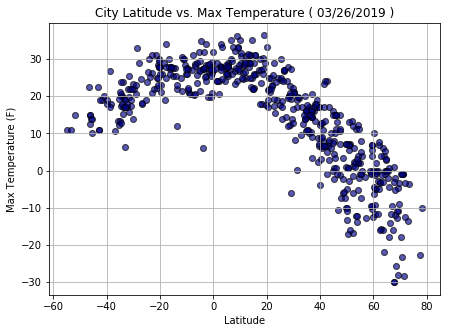

In [173]:
# Setting the figure size

plt.figure(figsize=(7,5))

# Plot the scatter plot 

plt.scatter(city_weather_df['Lat'], city_weather_df['Max Temp'], 
                linewidths=1.1,
                c = 'DarkBlue', edgecolors='black', alpha=0.65)

# Create Plot title and title for x & y coordinates 

today = dt.datetime.today().strftime('%m/%d/%Y')  

plt.grid(True)
plt.title(f"City Latitude vs. Max Temperature ( " + today + " )")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Create the 'images' directory in the PWD, if it is not already existing

if not os.path.exists(imgdirectory):
   os.makedirs(imgdirectory)

ImageFile =  img_dir_path + "City Latitude vs Max Temp Scatter plot.png"

# Remove the Scatter plot file from the 'images' directory, if it is already existing
if os.path.isfile(ImageFile):
  os.remove(ImageFile) 

# Save scatter Plot Figure with the file name and path provided
plt.savefig(ImageFile)

plt.show()

## Latitude vs. Humidity Plot

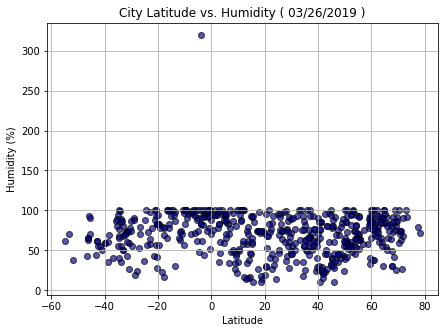

In [174]:
# Setting the figure size

plt.figure(figsize=(7,5))

# Plot the scatter plot 

plt.scatter(city_weather_df['Lat'], city_weather_df['Humidity'], 
                linewidths=1.1,
                c = 'DarkBlue', edgecolors='black', alpha=0.65)

# Create Plot title and title for x & y coordinates 

today = dt.datetime.today().strftime('%m/%d/%Y')  

plt.grid(True)
plt.title(f"City Latitude vs. Humidity ( " + today + " )")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Create the 'images' directory in the PWD, if it is not already existing

if not os.path.exists(imgdirectory):
   os.makedirs(imgdirectory)

ImageFile =  img_dir_path + "City Latitude vs Humidity Scatter plot.png"

# Remove the Scatter plot file from the 'images' directory, if it is already existing
if os.path.isfile(ImageFile):
  os.remove(ImageFile) 

# Save scatter Plot Figure with the file name and path provided
plt.savefig(ImageFile)

plt.show()


## Latitude vs. Cloudiness Plot

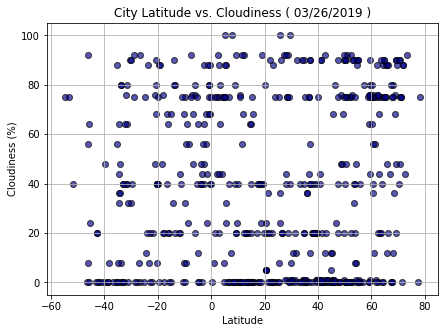

In [175]:
# Setting the figure size

plt.figure(figsize=(7,5))

# Plot the scatter plot 

plt.scatter(city_weather_df['Lat'], city_weather_df['Cloudiness'], 
                linewidths=1.1,
                c = 'DarkBlue', edgecolors='black', alpha=0.65)

# Create Plot title and title for x & y coordinates 

today = dt.datetime.today().strftime('%m/%d/%Y')  

plt.grid(True)
plt.title(f"City Latitude vs. Cloudiness ( " + today + " )")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Create the 'images' directory in the PWD, if it is not already existing

if not os.path.exists(imgdirectory):
   os.makedirs(imgdirectory)

ImageFile =  img_dir_path + "City Latitude vs Cloudiness Scatter plot.png"

# Remove the Scatter plot file from the 'images' directory, if it is already existing
if os.path.isfile(ImageFile):
  os.remove(ImageFile) 

# Save scatter Plot Figure with the file name and path provided
plt.savefig(ImageFile)

plt.show()

## Latitude vs. Wind Speed Plot

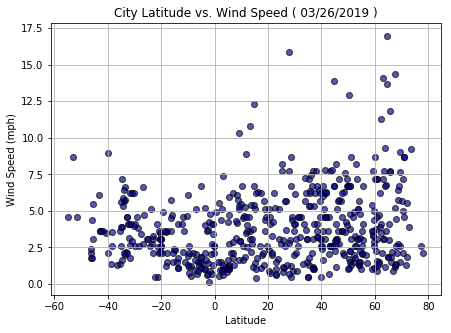

In [176]:
# Setting the figure size

plt.figure(figsize=(7,5))

# Plot the scatter plot 

plt.scatter(city_weather_df['Lat'], city_weather_df['Wind Speed'], 
                linewidths=1.1,
                c = 'DarkBlue', edgecolors='black', alpha=0.65)

# Create Plot title and title for x & y coordinates 

today = dt.datetime.today().strftime('%m/%d/%Y')  

plt.grid(True)
plt.title(f"City Latitude vs. Wind Speed ( " + today + " )")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Create the 'images' directory in the PWD, if it is not already existing

if not os.path.exists(imgdirectory):
   os.makedirs(imgdirectory)

ImageFile =  img_dir_path + "City Latitude vs Wind Speed Scatter plot.png"

# Remove the Scatter plot file from the 'images' directory, if it is already existing
if os.path.isfile(ImageFile):
  os.remove(ImageFile) 

# Save scatter Plot Figure with the file name and path provided
plt.savefig(ImageFile)

plt.show()

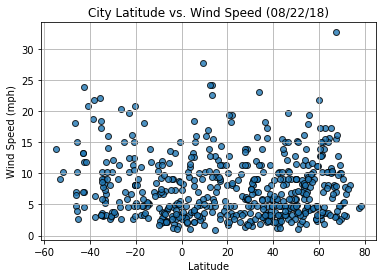

In [9]:
# Display from the old starter program (kept as reference)

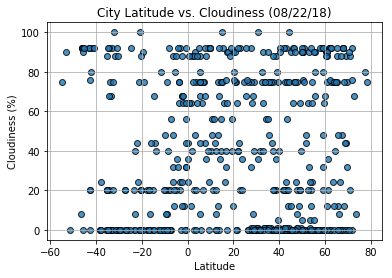

In [8]:
# Display from the old starter program (kept as reference)

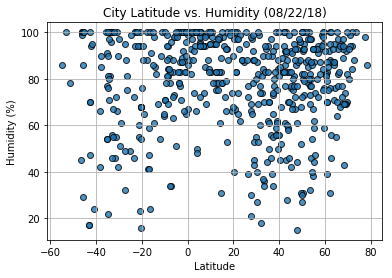

In [7]:
# Display from the old starter program (kept as reference)